## Install Packages

In [37]:
import sys
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install ultralytics
!{sys.executable} -m pip install roboflow
#!{sys.executable} -m pip install pip3 install torch torchvision torchaudio
!{sys.executable} -m pip install opencv-python 

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl (38.1 MB)


## Import packages

In [7]:
import cv2 
import numpy as np
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

## Preprocessing

At the end it wasnt needed

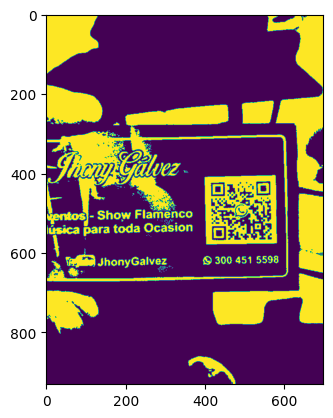

In [46]:
#Preprocessing
# Load the image
image_path = 'IMG_20230817_235548_765.jpg'  
image = cv2.imread("IMG_20230817_235548_765.jpg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
#blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)  
#blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)  
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)  

# Apply binary thresholding

ret,thresh1 = cv2.threshold(blurred_image,127,255,cv2.THRESH_BINARY)

# Display the images 
#cv2.imshow('Original Image', original_image)
#cv2.imshow('Grayscale Image', gray_image)
#cv2.imshow('Blurred Image', blurred_image)
#cv2.imshow('Binary Image', binary_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()



#NVM the preprocessig wasnt necessary
plt.imshow(thresh1)

## Load and train Yolo model

In [1]:

# Load a model
model = YOLO('yolov8n.yaml')  

#Train model
results = model.train(data='datasets/data.yaml', epochs=300, imgsz=159)



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

## Try model with a single image


image 1/1 C:\Users\laco-\Documents\Notebooks\QR_Code_Detector_Notebook\IMG_20230820_100924_960.jpg: 160x128 2 QR-codess, 14.0ms
Speed: 0.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 160, 128)


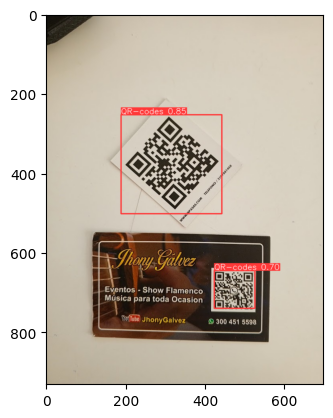

In [9]:

# Define trained model
model = YOLO('runs/detect/train12/weights/best.pt')

# Define path to the image file
source = 'IMG_20230820_100924_960.jpg'
#gray_image = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
# Run inference on the source
results = model.predict(source, conf =0.5) # list of Results objects
#results = model.predict(source)
len(results[0].boxes.data)
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    #im.show()  # show image
    #im.save('results.jpg')  # save image
    plt.imshow(im)

## Crop QR codes into QR-codes directory

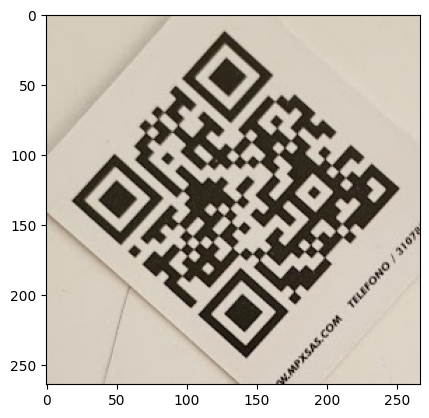

In [49]:

for result in results:
    result.save_crop('')
#print(n)
#len(results[0].boxes.data)
img1 = Image.open('QR-codes/im.jpg')
img2 = Image.open('QR-codes/im2.jpg')
plt.imshow(img1)


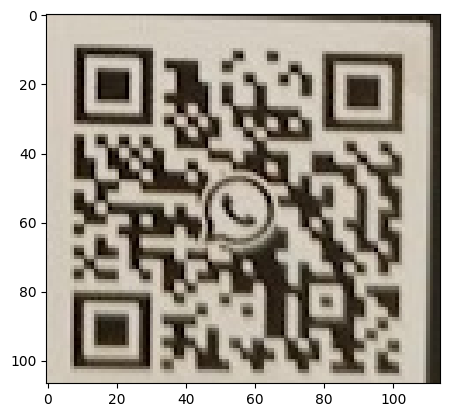

In [52]:
plt.imshow(img2)

In [49]:
#results[0].save_crop('predictions/')
from PIL import Image
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results.jpg')  # save image


## Evaluate model

In [2]:

model.val()

Ultralytics YOLOv8.0.157  Python-3.11.4 torch-2.0.1+cpu CPU (Intel Core(TM) i5-9300H 2.40GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning C:\Users\laco-\Documents\Notebooks\QR_Code_Detector_Notebook\datasets\valid\labels.cache... 54 images, 9 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<0
                   all         54         51      0.979      0.936      0.981       0.86
Speed: 0.2ms preprocess, 12.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\val4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001A9D051DD50>
fitness: 0.8720768084834988
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.86002])
names: {0: 'QR-codes'}
plot: True
results_dict: {'metrics/precision(B)': 0.9794786099015674, 'metrics/recall(B)': 0.9359547154605226, 'metrics/mAP50(B)': 0.9806170560329396, 'metrics/mAP50-95(B)': 0.8600167809780054, 'fitness': 0.8720768084834988}
save_dir: WindowsPath('runs/detect/val4')
speed: {'preprocess': 0.18466401983190467, 'inference': 12.872400107207122, 'loss': 0.0, 'postprocess': 0.3139354564525463}

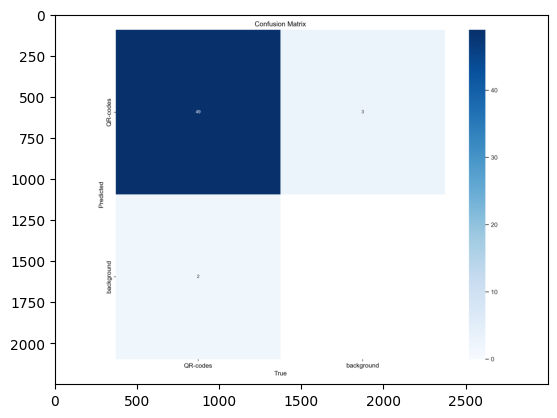

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('runs/detect/val4/confusion_matrix.png')
plt.imshow(img)

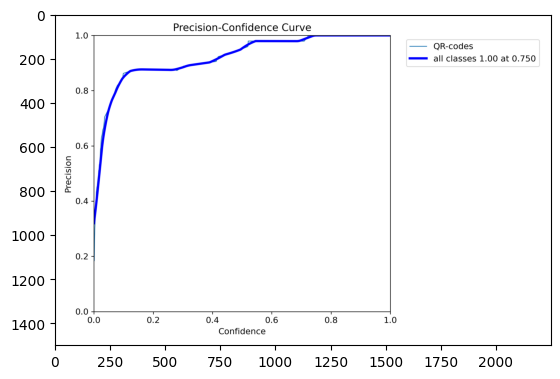

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('runs/detect/val4/P_curve.png')
plt.imshow(img)

## decode QR codes


In [21]:
qcd = cv2.QRCodeDetector()
img = cv2.imread('QR-codes/im.jpg')
retval, decoded_info, points, straight_qrcode = qcd.detectAndDecodeMulti(img)
print(decoded_info[0])

https://mpxsas.com/pets/


In [22]:
from IPython.display import IFrame
IFrame(decoded_info[0], 900,500)